In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
#from scipy.integrate import solve_ivp
plt.rcParams["figure.figsize"] = (20,10)

In [10]:
#RK4 & Euler Initials
x0 = 1.0
y0 = -1.5
x = x0 
y = y0
v = x0
z = y0
# constants
fm= 0.5
b = 0.2
c = 4.0
Omega = 2.0

#loop peramaters
nmax = 500
h = 0.1
t = 0 

tarray = []
xarray = []
zarray = []

In [11]:
#Functions 
def F(t,x,y):
    F = y
    return (F)

def G(t,x,y):
    G = -c * x - b * y + fm * np.sin(Omega*t)
    return (G)

def func(t,x,y):
    return -c * x - b * y + fm * np.sin(Omega*t)

for n in np.arange(0,nmax,1):
    t = t+h
    
    K1 = F(t,x,y)*h
    L1 = G(t,x,y)*h
    
    K2 = F(t+h/2,x+K1/2,y+L1/2)*h
    L2 = G(t+h/2,x+K1/2,y+L1/2)*h
    
    K3 = F(t+h/2,x+K2/2,y+L2/2)*h
    L3 = G(t+h/2,x+K2/2,y+L2/2)*h
    
    K4 = F(t+h,x+K3,y+L3)*h
    L4 = G(t+h,x+K3,y+L3)*h
    
    xt = x + (K1 + 2 * K2 + 2 * K3 + K4)/6
    yt = y + (L1 + 2 * L2 + 2 * L3 + L4)/6
    
    x = xt
    y = yt
    
    xarray.append(x)
    
    
    v = v + h * (-c*z-b*v)+h*fm*np.sin(Omega*t)
    z = z+h*v
    tarray.append(t)
    zarray.append(z)

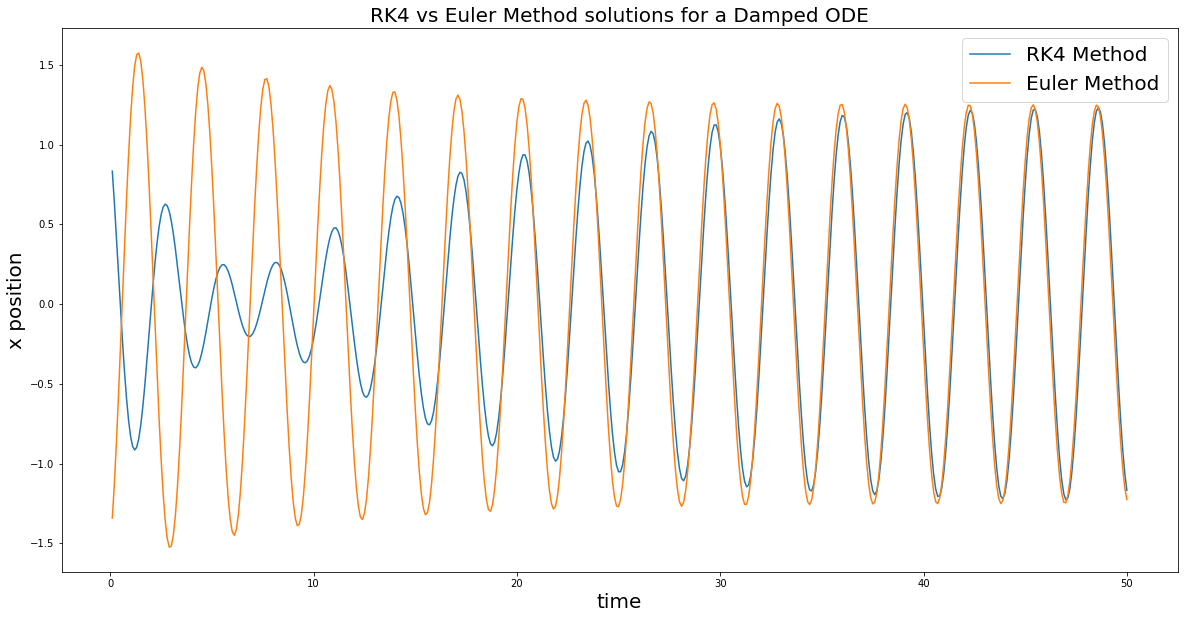

In [12]:
plt.title("RK4 vs Euler Method solutions for a Damped ODE",fontsize = 20)
plt.xlabel("time",fontsize = 20)
plt.ylabel("x position", fontsize = 20)

plt.plot(tarray,xarray, label="RK4 Method")
plt.plot(tarray,zarray, label="Euler Method")
plt.legend(fontsize = 20)
plt.savefig("RK4vsEuler")